<a href="https://colab.research.google.com/github/ErtKid/Machine_Learning_H3/blob/main/TP_ML_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TP Titanic**

*load the libraries and titanic data*

you can find it here :  https://www.kaggle.com/c/titanic/data

In [332]:
# Importation des bibliothèques nécessaires
import pandas as pd

# Chargement des données
train_data = pd.read_csv('dataset_titanic/train.csv')
test_data = pd.read_csv('dataset_titanic/test.csv')
# Copie des données originales
original_data = train_data.copy()


# Affichage des premières lignes des données d'entraînement pour vérification
print(train_data.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


*print the dataset shape*

In [333]:
# Affichage de la forme des jeux de données d'entraînement et de test
print("Taille du dataset d'entraînement :", train_data.shape)
print("Taille du dataset de test :", test_data.shape)


Taille du dataset d'entraînement : (891, 12)
Taille du dataset de test : (418, 11)


plot the NaN values with a heatmap

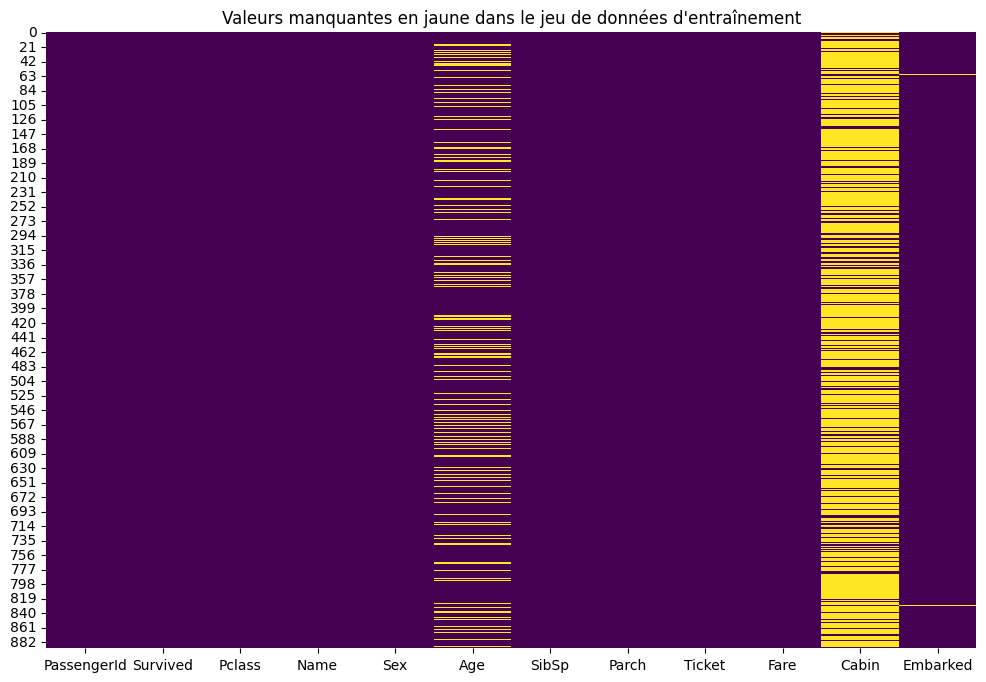

In [334]:
import seaborn as sns
import matplotlib.pyplot as plt

# Création d'une heatmap pour visualiser les valeurs manquantes dans le jeu de données d'entraînement
plt.figure(figsize=(12, 8))
sns.heatmap(train_data.isnull(), cbar=False, cmap='viridis')
plt.title('Valeurs manquantes en jaune dans le jeu de données d\'entraînement')
plt.show()



In [335]:
# Calcul du nombre total de valeurs dans la colonne "Age"
total_values = len(train_data['Age'])

# Calcul du nombre de valeurs manquantes dans la colonne "Age"
missing_values = train_data['Age'].isnull().sum()

# Calcul du pourcentage de valeurs manquantes
percentage_missing = (missing_values / total_values) * 100

print(f"Il y a {percentage_missing:.2f}% d'âge qui manquent")


Il y a 19.87% d'âge qui manquent


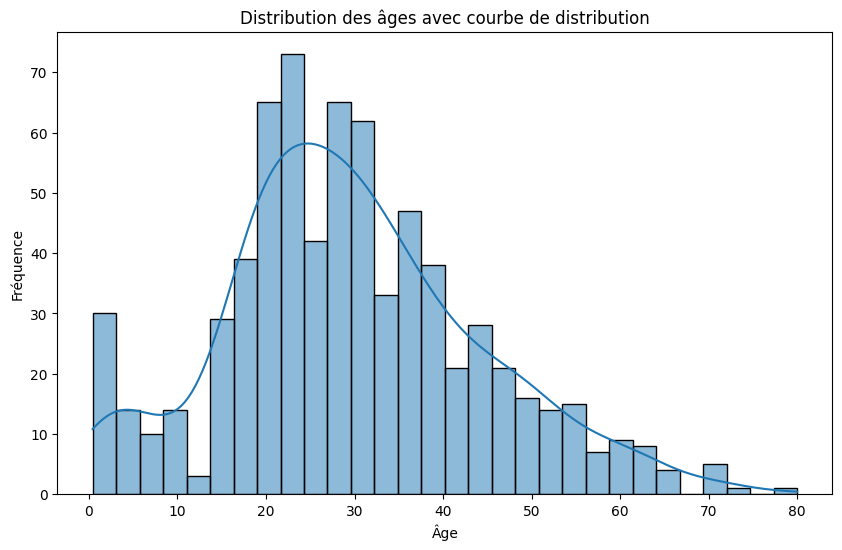

In [336]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration de la taille de la figure
plt.figure(figsize=(10, 6))

# Création de l'histogramme avec KDE
sns.histplot(train_data['Age'].dropna(), bins=30, kde=True, edgecolor='black')

# Configuration des titres et des labels
plt.title('Distribution des âges avec courbe de distribution')
plt.xlabel('Âge')
plt.ylabel('Fréquence')

# Affichage de la figure
plt.show()


In [337]:
# Calcul de la moyenne de la colonne 'Age'
mean_age = train_data['Age'].mean()
print(f"Moyenne de l'âge : {mean_age:.2f}")

# Calcul de la médiane de la colonne 'Age'
median_age = train_data['Age'].median()
print(f"Médiane de l'âge : {median_age}")




Moyenne de l'âge : 29.70
Médiane de l'âge : 28.0


In [338]:
# Calcul du nombre total de valeurs dans la colonne 'Cabin'
total_values = len(train_data['Cabin'])

# Calcul du nombre de valeurs manquantes dans la colonne 'Cabin'
missing_values = train_data['Cabin'].isna().sum()

# Calcul du pourcentage de valeurs manquantes
missing_percentage = (missing_values / total_values) * 100

print(f"Il y a {missing_percentage:.2f}% de valeurs manquantes dans la colonne 'Cabin'")


Il y a 77.10% de valeurs manquantes dans la colonne 'Cabin'


In [339]:
# Calcul de la distribution des valeurs dans la colonne 'Embarked'
embarked_distribution = train_data['Embarked'].value_counts()

print("Répartition des passagers en fonction du port d'embarquement (C = Cherbourg, Q = Queenstown, S = Southampton) :")
print(embarked_distribution)


Répartition des passagers en fonction du port d'embarquement (C = Cherbourg, Q = Queenstown, S = Southampton) :
S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [340]:
# Remplacement des valeurs manquantes dans la colonne 'Age' par la médiane
age_median = train_data['Age'].median()
train_data['Age'].fillna(age_median, inplace=True)

# Remplacement des valeurs manquantes dans la colonne 'Embarked' par 'S' (la valeur la plus fréquente)
train_data['Embarked'].fillna('S', inplace=True)

# Suppression de la colonne 'Cabin' car elle a trop de valeurs manquantes
train_data.drop('Cabin', axis=1, inplace=True)

# Vérification des résultats
print(train_data.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


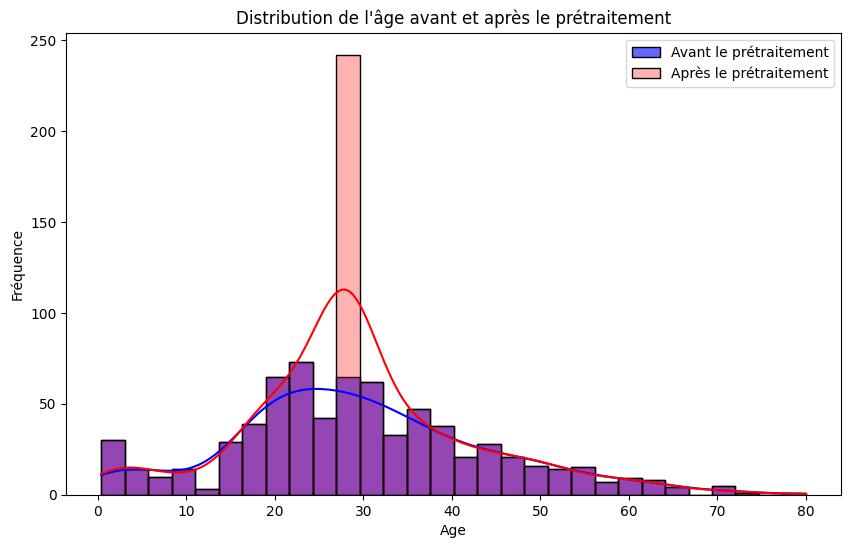

In [341]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))

# Histogramme avant le prétraitement avec transparence
sns.histplot(original_data['Age'].dropna(), bins=30, kde=True, label='Avant le prétraitement', color='blue', alpha=0.6)

# Histogramme après le prétraitement avec transparence
sns.histplot(train_data['Age'], bins=30, kde=True, label='Après le prétraitement', color='red', alpha=0.3)

plt.title('Distribution de l\'âge avant et après le prétraitement')
plt.xlabel('Age')
plt.ylabel('Fréquence')
plt.legend()

plt.show()



In [342]:
# Créer une nouvelle colonne 'FamilySize' qui est la somme de 'SibSp' et 'Parch' plus 1 (pour le passager lui-même)
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1

# Créer la colonne 'TravelAlone' où si 'FamilySize' est 1, alors le passager voyage seul
train_data['TravelAlone'] = train_data['FamilySize'].apply(lambda x: 1 if x == 1 else 0)

# Afficher les premières lignes du DataFrame pour vérifier
print(train_data.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  FamilySize  TravelAlone  
0      0         A/5 21171   7.2500        S           2            0  
1      0          PC 17599  71.2833        C           2            0  
2      0  STON/O2. 3101282   7.9250        S           1            1  
3      0            113803  53.1

In [343]:
# Importer la bibliothèque pandas
import pandas as pd

# Utiliser get_dummies pour encoder les variables catégorielles
encoded_sex = pd.get_dummies(train_data['Sex'], prefix='Sex')
encoded_embarked = pd.get_dummies(train_data['Embarked'], prefix='Embarked')
encoded_pclass = pd.get_dummies(train_data['Pclass'], prefix='Pclass')

# Supprimer les colonnes originales
train_data.drop(['Sex', 'Embarked', 'Pclass'], axis=1, inplace=True)

# Concaténer les nouvelles colonnes encodées au DataFrame original
train_data = pd.concat([train_data, encoded_sex, encoded_embarked, encoded_pclass], axis=1)

# Afficher les premières lignes pour vérifier
print(train_data.head())


   PassengerId  Survived                                               Name  \
0            1         0                            Braund, Mr. Owen Harris   
1            2         1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3         1                             Heikkinen, Miss. Laina   
3            4         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5         0                           Allen, Mr. William Henry   

    Age  SibSp  Parch            Ticket     Fare  FamilySize  TravelAlone  \
0  22.0      1      0         A/5 21171   7.2500           2            0   
1  38.0      1      0          PC 17599  71.2833           2            0   
2  26.0      0      0  STON/O2. 3101282   7.9250           1            1   
3  35.0      1      0            113803  53.1000           2            0   
4  35.0      0      0            373450   8.0500           1            1   

   Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  P

In [344]:
# Supprimer les colonnes inutiles
train_data.drop(['Sex_female', 'SibSp', 'Parch', 'PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

# Afficher les premières lignes pour vérifier que les colonnes ont été supprimées
print(train_data.head())


   Survived   Age     Fare  FamilySize  TravelAlone  Sex_male  Embarked_C  \
0         0  22.0   7.2500           2            0         1           0   
1         1  38.0  71.2833           2            0         0           1   
2         1  26.0   7.9250           1            1         0           0   
3         1  35.0  53.1000           2            0         0           0   
4         0  35.0   8.0500           1            1         1           0   

   Embarked_Q  Embarked_S  Pclass_1  Pclass_2  Pclass_3  
0           0           1         0         0         1  
1           0           0         1         0         0  
2           0           1         0         0         1  
3           0           1         1         0         0  
4           0           1         0         0         1  


In [345]:
# Créer une copie du jeu de données de test
test_data_copy = test_data.copy()

# Afficher les premières lignes pour vérifier que les colonnes ont été supprimées
print(test_data_copy.head())

# Imprimer les valeurs nulles dans le jeu de données de test
print(test_data_copy.isnull().sum())


   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin 

In [346]:
import numpy as np

# Gérer les valeurs manquantes pour 'Age' et 'Fare' (si nécessaire)
test_data_copy['Age'].fillna(test_data_copy['Age'].median(), inplace=True)
test_data_copy['Fare'].fillna(test_data_copy['Fare'].median(), inplace=True)

# Créer la fonctionnalité 'TravelAlone'
test_data_copy['TravelAlone'] = np.where((test_data_copy['SibSp'] + test_data_copy['Parch']) > 0, 0, 1)

# Encodage des variables catégorielles
test_data_copy = pd.get_dummies(test_data_copy, columns=['Pclass', 'Embarked', 'Sex'])

# Supprimer les colonnes inutiles
test_data_copy.drop(['Sex_female', 'SibSp', 'Parch', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Afficher les premières lignes pour vérifier que les colonnes ont été correctement modifiées
print(test_data_copy.head())

# Imprimer les valeurs nulles dans le jeu de données de test
print(test_data_copy.isnull().sum())


    Age     Fare  TravelAlone  Pclass_1  Pclass_2  Pclass_3  Embarked_C  \
0  34.5   7.8292            1         0         0         1           0   
1  47.0   7.0000            0         0         0         1           0   
2  62.0   9.6875            1         0         1         0           0   
3  27.0   8.6625            1         0         0         1           0   
4  22.0  12.2875            0         0         0         1           0   

   Embarked_Q  Embarked_S  Sex_male  
0           1           0         1  
1           0           1         0  
2           1           0         1  
3           0           1         1  
4           0           1         0  
Age            0
Fare           0
TravelAlone    0
Pclass_1       0
Pclass_2       0
Pclass_3       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
Sex_male       0
dtype: int64


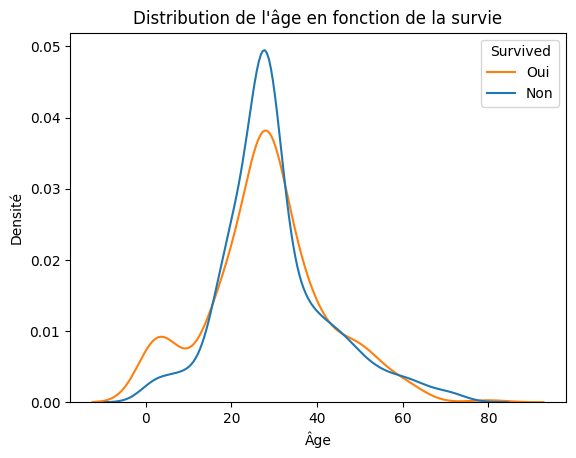

In [347]:
import seaborn as sns
import matplotlib.pyplot as plt

# Créer un graphique de densité pour la distribution de l'âge en fonction de la survie
sns.kdeplot(data=train_data, x='Age', hue='Survived', common_norm=False)

plt.title('Distribution de l\'âge en fonction de la survie')
plt.xlabel('Âge')
plt.ylabel('Densité')
plt.legend(title='Survived', labels=['Oui', 'Non'])

plt.show()


In [348]:
import pandas as pd

# Ajouter la variable 'IsMinor'
train_data['IsMinor'] = train_data['Age'].apply(lambda x: 1 if x < 16 else 0)

# Faire la même chose pour le jeu de données de test si nécessaire
test_data_copy['IsMinor'] = test_data_copy['Age'].apply(lambda x: 1 if x < 16 else 0)

# Afficher les premières lignes pour vérifier que la nouvelle colonne a été ajoutée
print(train_data.head())


   Survived   Age     Fare  FamilySize  TravelAlone  Sex_male  Embarked_C  \
0         0  22.0   7.2500           2            0         1           0   
1         1  38.0  71.2833           2            0         0           1   
2         1  26.0   7.9250           1            1         0           0   
3         1  35.0  53.1000           2            0         0           0   
4         0  35.0   8.0500           1            1         1           0   

   Embarked_Q  Embarked_S  Pclass_1  Pclass_2  Pclass_3  IsMinor  
0           0           1         0         0         1        0  
1           0           0         1         0         0        0  
2           0           1         0         0         1        0  
3           0           1         1         0         0        0  
4           0           1         0         0         1        0  


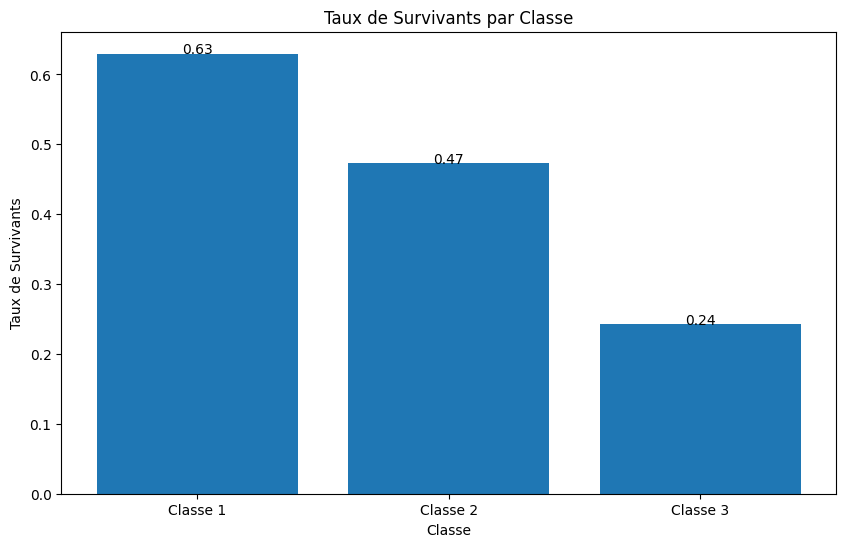

In [349]:
# Calculer le nombre total de passagers dans chaque classe
total_passengers_class_1 = len(train_data[train_data['Pclass_1'] == 1])
total_passengers_class_2 = len(train_data[train_data['Pclass_2'] == 1])
total_passengers_class_3 = len(train_data[train_data['Pclass_3'] == 1])

# Calculer le nombre de survivants dans chaque classe
survivors_by_class_1 = len(train_data[(train_data['Pclass_1'] == 1) & (train_data['Survived'] == 1)])
survivors_by_class_2 = len(train_data[(train_data['Pclass_2'] == 1) & (train_data['Survived'] == 1)])
survivors_by_class_3 = len(train_data[(train_data['Pclass_3'] == 1) & (train_data['Survived'] == 1)])


# Calculer le taux de survivants pour chaque classe
survival_rate_class_1 = survivors_by_class_1 / total_passengers_class_1
survival_rate_class_2 = survivors_by_class_2 / total_passengers_class_2
survival_rate_class_3 = survivors_by_class_3 / total_passengers_class_3

# Données pour le diagramme
classes = ['Classe 1', 'Classe 2', 'Classe 3']
survival_rates = [survival_rate_class_1, survival_rate_class_2, survival_rate_class_3]

# Création du diagramme à barres
plt.figure(figsize=(10, 6))
plt.bar(classes, survival_rates)

# Ajout des étiquettes et titres
plt.xlabel('Classe')
plt.ylabel('Taux de Survivants')
plt.title('Taux de Survivants par Classe')

# Affichage des valeurs sur les barres
for i, value in enumerate(survival_rates):
    plt.text(i, value, f"{value:.2f}", ha='center')

# Afficher le diagramme
plt.show()




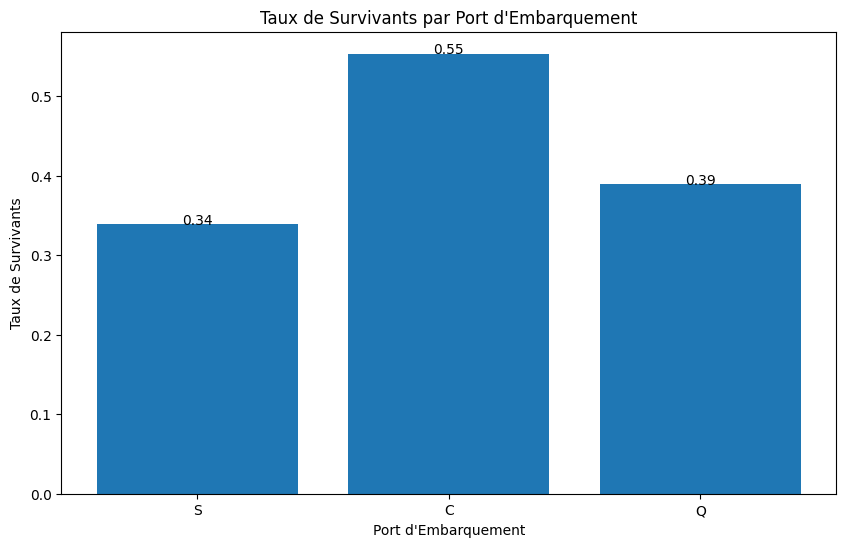

In [350]:
# Calculer le nombre total de passagers pour chaque port d'embarquement
total_passengers_embarked_S = len(train_data[train_data['Embarked_S'] == 1])
total_passengers_embarked_C = len(train_data[train_data['Embarked_C'] == 1])
total_passengers_embarked_Q = len(train_data[train_data['Embarked_Q'] == 1])


survivors_by_embarked_S = len(train_data[(train_data['Embarked_S'] == 1) & (train_data['Survived'] == 1)])
survivors_by_embarked_C = len(train_data[(train_data['Embarked_C'] == 1) & (train_data['Survived'] == 1)])
survivors_by_embarked_Q = len(train_data[(train_data['Embarked_Q'] == 1) & (train_data['Survived'] == 1)])


# Calculer le taux de survivants pour chaque port d'embarquement
survival_rate_embarked_S = survivors_by_embarked_S / total_passengers_embarked_S
survival_rate_embarked_C = survivors_by_embarked_C / total_passengers_embarked_C
survival_rate_embarked_Q = survivors_by_embarked_Q / total_passengers_embarked_Q

# Données pour le diagramme
survival_rates_embarked = [survival_rate_embarked_S, survival_rate_embarked_C, survival_rate_embarked_Q]
embarked_ports = ['S', 'C', 'Q']

# Création du diagramme à barres
plt.figure(figsize=(10, 6))
plt.bar(embarked_ports, survival_rates_embarked)

# Ajout des étiquettes et titres
plt.xlabel('Port d\'Embarquement')
plt.ylabel('Taux de Survivants')
plt.title('Taux de Survivants par Port d\'Embarquement')

# Affichage des valeurs sur les barres
for i, value in enumerate(survival_rates_embarked):
    plt.text(i, value, f"{value:.2f}", ha='center')

# Afficher le diagramme
plt.show()


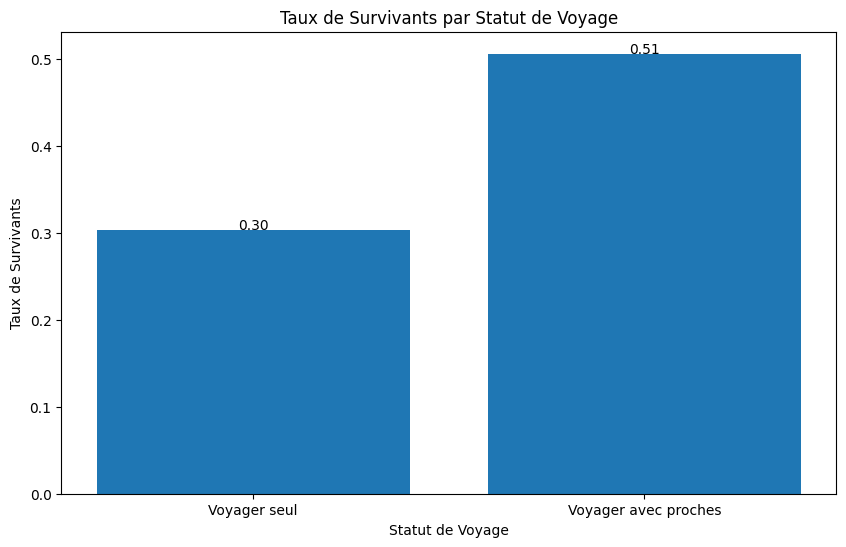

In [351]:
# Calculer le nombre total de personnes pour chaque statut de voyage
total_traveling_alone = len(train_data[train_data['TravelAlone'] == 1])
total_traveling_with_family = len(train_data[train_data['TravelAlone'] == 0])

# Calculer le nombre total de survivants qui voyagent seuls et en famille
survivors_traveling_alone = len(train_data[(train_data['Survived'] == 1) & (train_data['TravelAlone'] == 1)])
survivors_traveling_with_family = len(train_data[(train_data['Survived'] == 1) & (train_data['TravelAlone'] == 0)])

# Calculer le taux de survie pour ceux qui voyagent seuls et en famille
survival_rate_traveling_alone = survivors_traveling_alone / total_traveling_alone
survival_rate_traveling_with_family = survivors_traveling_with_family / total_traveling_with_family


# Calculer le taux de survivants pour chaque statut de voyage
survival_rate_traveling_alone = survivors_traveling_alone / total_traveling_alone
survival_rate_traveling_with_family = survivors_traveling_with_family / total_traveling_with_family

travel_status = ['Voyager seul', 'Voyager avec proches']

# Données pour le diagramme
survival_rates_travel = [survival_rate_traveling_alone, survival_rate_traveling_with_family]



# Création du diagramme à barres
plt.figure(figsize=(10, 6))
plt.bar(travel_status, survival_rates_travel)

# Ajout des étiquettes et titres
plt.xlabel('Statut de Voyage')
plt.ylabel('Taux de Survivants')
plt.title('Taux de Survivants par Statut de Voyage')

# Affichage des valeurs sur les barres
for i, value in enumerate(survival_rates_travel):
    plt.text(i, value, f"{value:.2f}", ha='center')

# Afficher le diagramme
plt.show()



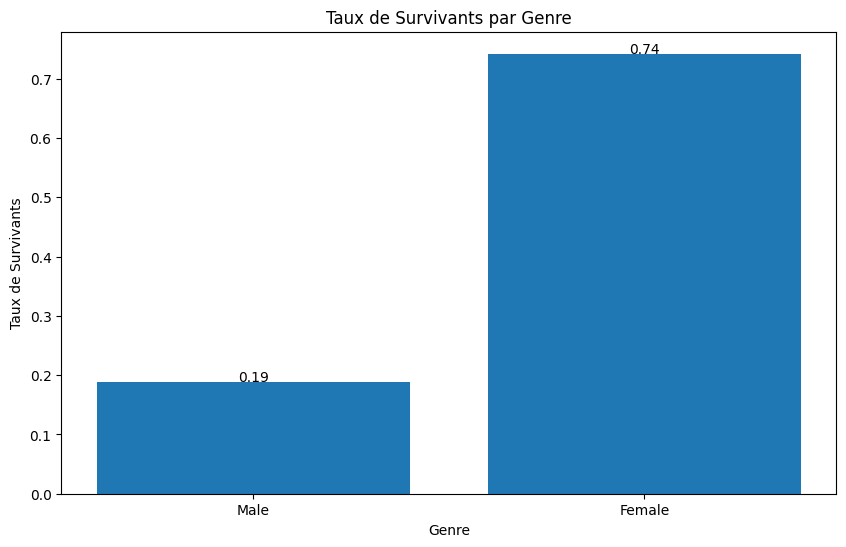

In [352]:
import matplotlib.pyplot as plt

# Calculer le nombre total d'hommes et de femmes
total_males = len(train_data[train_data['Sex_male'] == 1])
total_females = len(train_data[train_data['Sex_male'] == 0])

survivors_male = len(train_data[(train_data['Survived'] == 1) & (train_data['Sex_male'] == 1)])
survivors_female = len(train_data[(train_data['Survived'] == 1) & (train_data['Sex_male'] == 0)])

# Calculer le taux de survivants pour chaque genre
survival_rate_male = survivors_male / total_males
survival_rate_female = survivors_female / total_females

# Données pour le diagramme
survival_rates_gender = [survival_rate_male, survival_rate_female]

genders = ['Male', 'Female']


# Création du diagramme à barres
plt.figure(figsize=(10, 6))
plt.bar(genders, survival_rates_gender)

# Ajout des étiquettes et titres
plt.xlabel('Genre')
plt.ylabel('Taux de Survivants')
plt.title('Taux de Survivants par Genre')

# Affichage des valeurs sur les barres
for i, value in enumerate(survival_rates_gender):
    plt.text(i, value, f"{value:.2f}", ha='center')

# Afficher le diagramme
plt.show()



# Logistic Regression with scikit-learn

In [353]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

final_train = train_data

cols = ["Age","Fare","TravelAlone","Pclass_1","Pclass_2","Embarked_C","Embarked_S","Sex_male","IsMinor"]
X = final_train[cols]
y = final_train['Survived']




In [354]:

model = LogisticRegression()


In [355]:
# Cration du RFE model et select 4 attributes
logreg = LogisticRegression(max_iter=10000)
rfe = RFE(estimator=logreg, n_features_to_select=4)
rfe = rfe.fit(X, y)

print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['Pclass_1', 'Pclass_2', 'Sex_male', 'IsMinor']


In [356]:
# Cration du RFE model et select 8 attributes
logreg = LogisticRegression(max_iter=10000)
rfe = RFE(estimator=logreg, n_features_to_select=8)
rfe = rfe.fit(X, y)

print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']


In [357]:
from sklearn.feature_selection import RFECV
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Optimal number of features: 8
Selected features: ['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

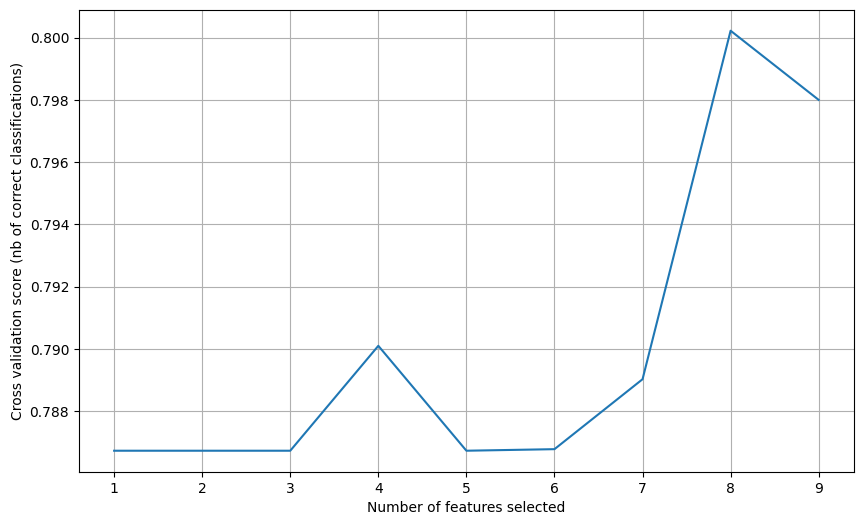

In [358]:
# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])


plt.grid(True)

plt.show()

In [359]:
import pandas as pd

# Obtenir les colonnes sélectionnées
selected_columns = X.columns[rfecv.support_]

# Créer un nouveau DataFrame avec seulement les colonnes sélectionnées
new_X = X[selected_columns]

# Afficher la forme du nouveau DataFrame
print("Shape of new DataFrame:", new_X.shape, y.shape)


Shape of new DataFrame: (891, 8) (891,)


In [360]:
from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.2, random_state=42)

# Afficher la forme des ensembles d'entraînement et de test
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (712, 8)
Shape of X_test: (179, 8)
Shape of y_train: (712,)
Shape of y_test: (179,)


In [361]:
from sklearn.linear_model import LogisticRegression

# Instancier le modèle de régression logistique
logreg = LogisticRegression(max_iter=10000)

# Ajuster le modèle aux données d'entraînement
logreg.fit(X_train, y_train)

# Afficher les paramètres du modèle
print(logreg)



LogisticRegression(max_iter=10000)


In [362]:
# Faire une prédiction sur l'ensemble de test
y_pred = logreg.predict(X_test)

# Afficher les prédictions
print("Prédictions sur l'ensemble de test :", y_pred)


Prédictions sur l'ensemble de test : [0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1]


In [363]:
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score
from sklearn.linear_model import LogisticRegression

# Instancier et ajuster le modèle
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# Calculer les métriques
accuracy = accuracy_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Train/Test split results:")
print(f"LogisticRegression accuracy is {accuracy:.3f}")
print(f"LogisticRegression log_loss is {logloss:.3f}")
print(f"LogisticRegression auc is {roc_auc:.3f}")


Train/Test split results:
LogisticRegression accuracy is 0.804
LogisticRegression log_loss is 0.432
LogisticRegression auc is 0.873


# ROC Curve and AUC Score

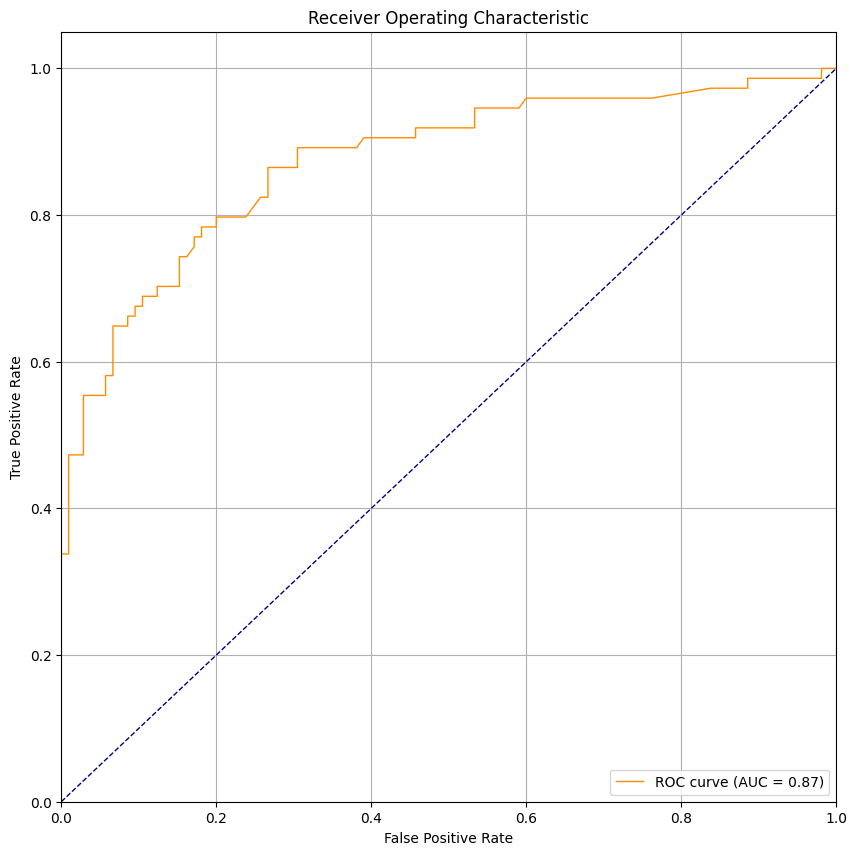

In [364]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculer les taux de vrais positifs et de faux positifs
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculer l'AUC
roc_auc = auc(fpr, tpr)

# Afficher la courbe ROC
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='darkorange', lw=1, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


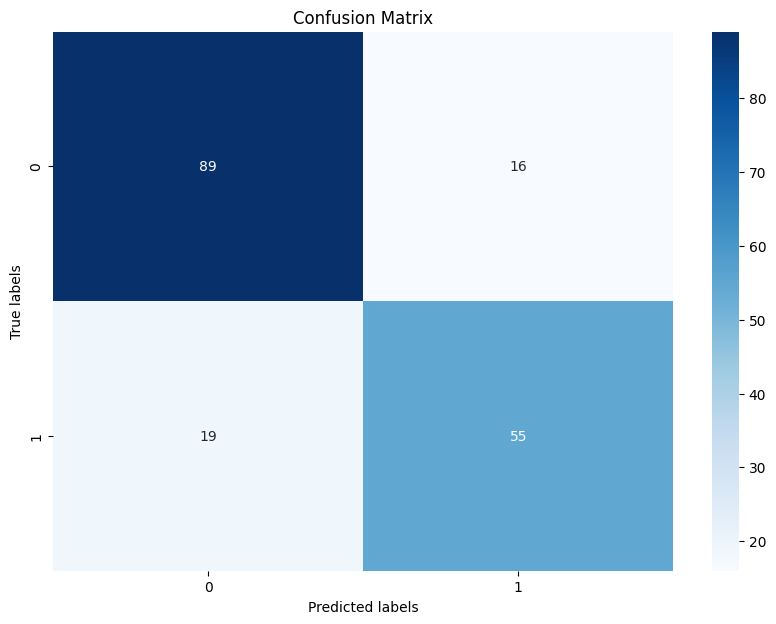

In [365]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Créer un heatmap pour la matrice de confusion
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [366]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Instancier le modèle de régression logistique
logreg = LogisticRegression(max_iter=10000)

# Calculer les scores de validation croisée pour l'exactitude
accuracy_scores = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
print("10-fold cross-validation accuracy: ", accuracy_scores.mean())

# Calculer les scores de validation croisée pour la perte logarithmique négative
log_loss_scores = cross_val_score(logreg, X, y, cv=10, scoring='neg_log_loss')
print("10-fold cross-validation log loss: ", -log_loss_scores.mean())

# Calculer les scores de validation croisée pour l'AUC ROC
roc_auc_scores = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')
print("10-fold cross-validation AUC: ", roc_auc_scores.mean())


10-fold cross-validation accuracy:  0.7957428214731586
10-fold cross-validation log loss:  0.45497557856358456
10-fold cross-validation AUC:  0.8487028265851796
